In [ ]:
1. Realizar un análisis exploratorio de los datos para identificar
relaciones entre variables, valores atípicos, tendencias, etc. 

In [3]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd

# Cargar el dataset
file_path = "C:/Users/Juanfe/Desktop/Mall_Customers.csv"
df = pd.read_csv(file_path)

# Mostrar las primeras filas para análisis preliminar
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


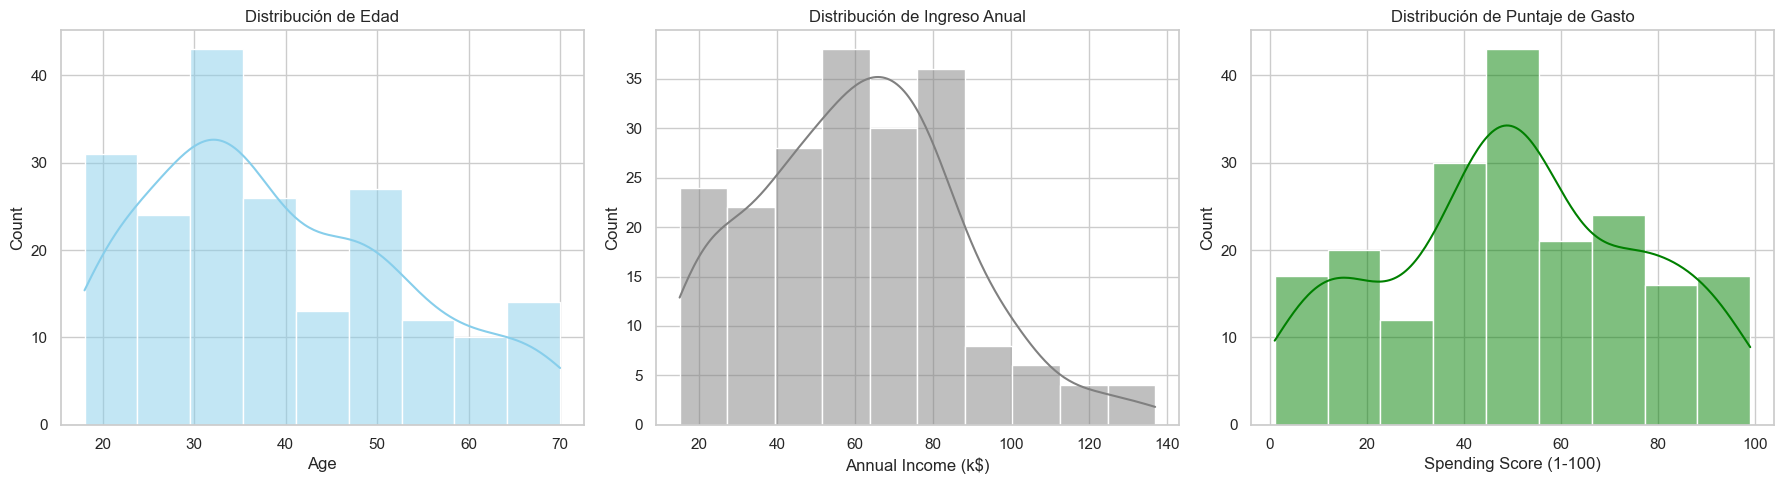

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
sns.set(style="whitegrid")

# Estadísticas descriptivas básicas
desc_stats = df.describe()

# Visualización de la distribución de variables numéricas
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Age'], kde=True, ax=axs[0], color='skyblue').set_title("Distribución de Edad")
sns.histplot(df['Annual Income (k$)'], kde=True, ax=axs[1], color='grey').set_title("Distribución de Ingreso Anual")
sns.histplot(df['Spending Score (1-100)'], kde=True, ax=axs[2], color='green').set_title("Distribución de Puntaje de Gasto")

plt.tight_layout()
plt.show()

desc_stats

In [ ]:
►Distribución de Variables:
»Edad (Age): La mayoría de los clientes tienen entre 20 y 50 años, con una media de aproximadamente 39 años.
»Ingreso Anual (Annual Income): El ingreso medio es de 60.56 mil dólares. Se observa una concentración entre los 40k y 80k.
»Puntaje de Gasto (Spending Score): La media está alrededor de 50.2. Los puntajes están bastante distribuidos, con algunos 
clientes que gastan muy poco y otros mucho.

►Conclusión:
»Los datos están bien distribuidos y no hay valores faltantes o atipicos.
»Se pueden ver posibles subgrupos de clientes, lo cual es ideal para aplicar técnicas de Clustering.

In [7]:
# Eliminar columna que no aporta al análisis (ID)
df_cleaned = df.drop(columns=["CustomerID"])

# Codificar la columna 'Gender': Female = 0, Male = 1
df_cleaned["Gender"] = df_cleaned["Gender"].map({"Female": 0, "Male": 1})

# Mostrar los primeros registros del nuevo DataFrame
print(df_cleaned.head())

# Verificar si hay valores nulos
print("\nValores nulos por columna:")
print(df_cleaned.isnull().sum())

# Verificar tipos de datos
print("\nTipos de datos:")
print(df_cleaned.dtypes)

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40

Valores nulos por columna:
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Tipos de datos:
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object


In [ ]:
►Eliminamos la columna Id que no se va a a usar en el analisis, se codifica la columna de Genre Female por 0 y Male por 1, 
se verifica si hay valores nulos y se muestra el tipo de datos.


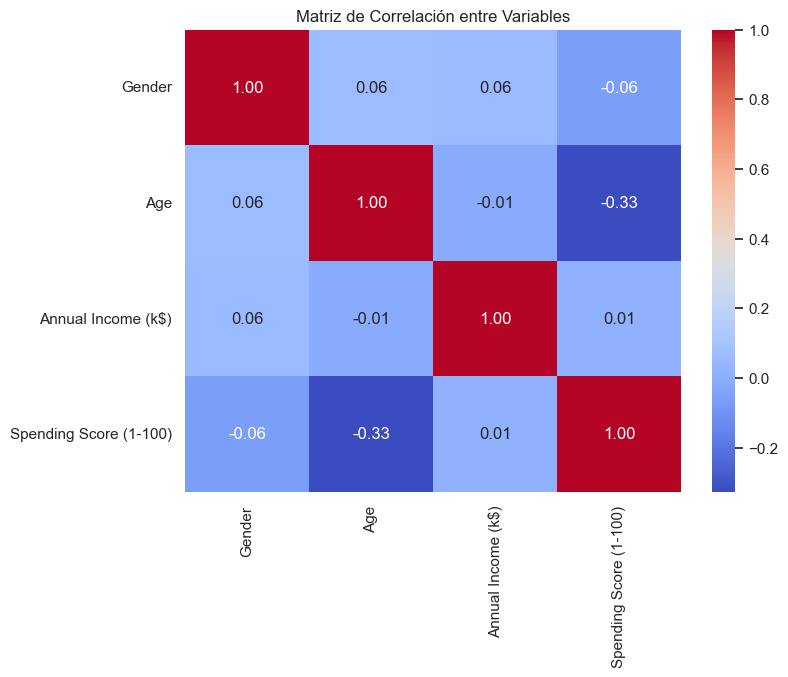

   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación
correlation_matrix = df_cleaned.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Variables")
plt.show()

# Selección manual de características más relevantes
features = df_cleaned[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Vista previa del dataset reducido
print(features.head())

C:\ProgramData\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


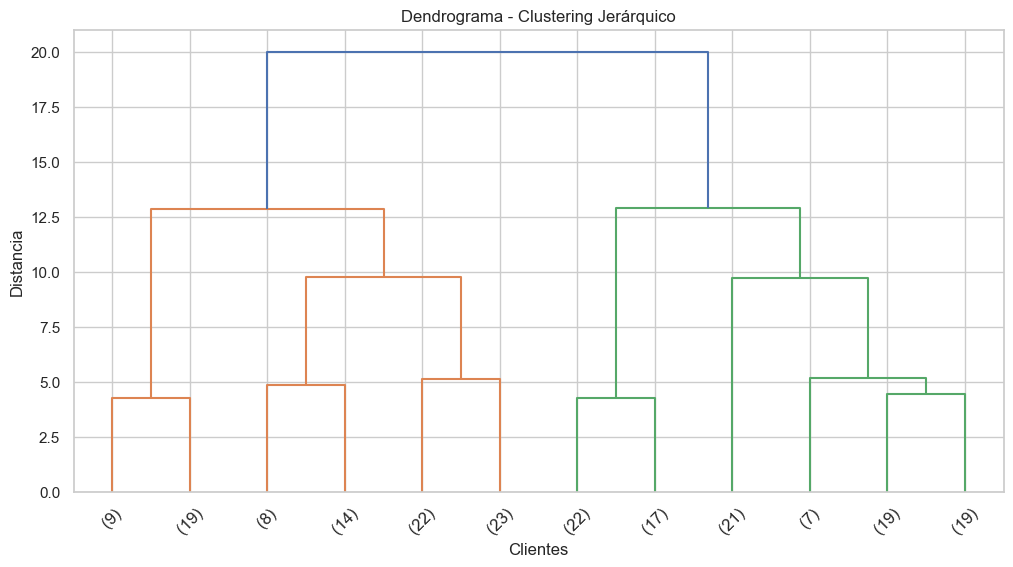

In [13]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Selección de características
features = df_cleaned[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Normalización
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Entrenamiento del modelo K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Entrenamiento del Clustering Jerárquico
linked = linkage(scaled_features, method='ward')

# Dendrograma
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=12.)
plt.title("Dendrograma - Clustering Jerárquico")
plt.xlabel("Clientes")
plt.ylabel("Distancia")
plt.show()


In [ ]:
►K-Means
» Se entrenó con 5 clústeres (k=5) como valor inicial.
» El modelo asignó una etiqueta de clúster a cada cliente.

►Clustering Jerárquico
» Se usó el método Ward para construir el dendrograma.
» El gráfico muestra cómo se agrupan los clientes según la distancia entre ellos.

In [27]:
from sklearn import metrics

# Evaluación del modelo K-Means
labels = kmeans.labels_
X = scaled_features  # Para mayor claridad en el uso
from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import pdist

# Calcular la matriz de distancias originales
dist_matrix = pdist(scaled_features)

# Crear el modelo de clustering jerárquico
Z = linkage(scaled_features, method='ward') 

# Calcular el coeficiente de correlación cofenética
coph_corr, _ = cophenet(Z, dist_matrix)


print("Medidas de calidad:")
print(f"- Coeficiente de Silhouette: {metrics.silhouette_score(X, labels):.4f}")
print(f"- Índice de Calinski-Harabasz: {metrics.calinski_harabasz_score(X, labels):.2f}")
print(f"- Inercia (Suma de cuadrados intra-cluster): {kmeans.inertia_:.2f}")
print(f"- Índice de Davies-Bouldin: {metrics.davies_bouldin_score(X, labels):.4f}")
print(f"- Coeficiente de correlación cofenética:", round(coph_corr, 4))


Medidas de calidad para K-Means:
- Coeficiente de Silhouette: 0.4085
- Índice de Calinski-Harabasz: 123.42
- Inercia (Suma de cuadrados intra-cluster): 169.89
- Índice de Davies-Bouldin: 0.8890
- Coeficiente de correlación cofenética: 0.6262


C:\Users\Juanfe\AppData\Local\Temp\ipykernel_9420\3400390111.py:13: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(data=clustered_df, x='Annual Income (k$)', y='Spending Score (1-100)',


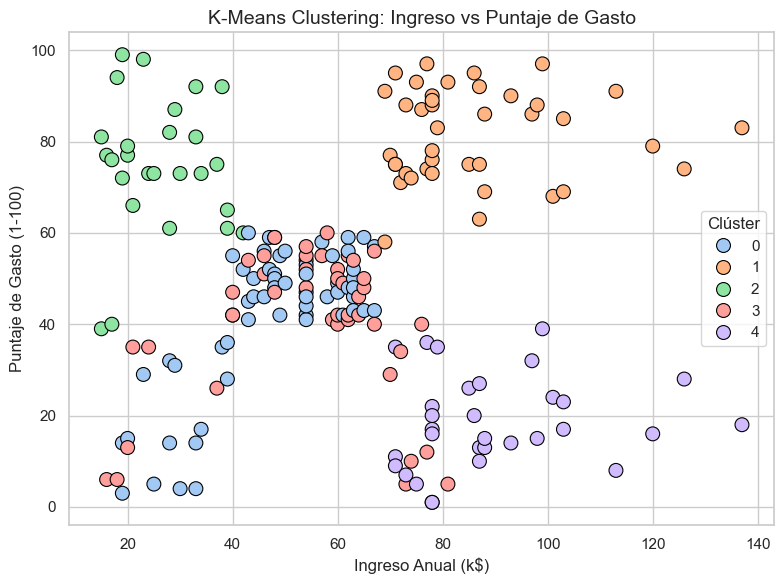

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertimos a DataFrame para graficar
clustered_df = df_cleaned.copy()
clustered_df['Cluster'] = kmeans.labels_

# Paleta de colores
palette = sns.color_palette("pastel")

# Gráfico de dispersión en 2D (usando las 2 variables más influyentes)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=clustered_df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette=palette, s=100, edgecolor='black')
plt.title("K-Means Clustering: Ingreso vs Puntaje de Gasto", fontsize=14)
plt.xlabel("Ingreso Anual (k$)")
plt.ylabel("Puntaje de Gasto (1-100)")
plt.legend(title="Clúster")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
1. Análisis Exploratorio Inicial:

    Distribución de Variables: Observamos las distribuciones de "Age", "Annual Income (k$)" y "Spending Score (1-100)" a través de 
    histogramas y KDE esto nos dio una idea de cómo se comportan estas variables, identificando rangos típicos y posibles valores 
    atípicos.
    Estadísticas Descriptivas: Se calcularon estadísticas como la media, desviación estándar, mínimo, máximo, etc. 
    para entender mejor la tendencia central y la dispersión de los datos.

2. Limpieza y Preprocesamiento de Datos:

    » Eliminación de "CustomerID": Esta columna no aportaba información relevante para el análisis de segmentación de clientes, 
    así que la eliminamos.
    » Codificación de "Gender": Convertimos la variable categórica "Gender" a numérica (0 para "Female", 1 para "Male") 
    para poderla incluir en los modelos de clustering.
    » Verificación de Valores Nulos y Tipos de Datos: Aseguramos que no hubiera datos faltantes y que los tipos de datos 
    fueran los correctos para el análisis.

3. Análisis de Correlación:

    » Matriz de Correlación y Heatmap: Visualizamos la matriz de correlación para entender las relaciones lineales entre las 
    variables numéricas, esto ayudó a identificar qué variables podrían estar influyendo más en la segmentación y se pudo 
    observar algunas correlaciones débiles, indicando que las variables son relativamente independientes.
    
    » Selección Manual de Características: nos enfocamos en "Age", "Annual Income (k$)" y "Spending Score (1-100)"
    para el clustering, ya que son las variables que intuitivamente más podrían diferenciar los grupos de clientes.

4. Clustering:

    » Normalización de Datos: Escalamos las características usando `StandardScaler` para asegurarnos de que todas las 
    variables contribuyeran de manera equitativa al algoritmo de clustering.
    
    » K-Means Clustering: Aplicamos K-Means con 5 clústeres (n_clusters=5), basándonos en la intuición y la práctica 
    común de segmentar clientes en grupos manejables, el algoritmo asignó cada cliente a uno de los 5 clústeres.
    
    » Clustering Jerárquico: Utilizamos el clustering jerárquico para visualizar las relaciones entre los 
    clientes y potencialmente determinar el número óptimo de clústeres. 
    
    » El dendrograma nos proporcionó una perspectiva de cómo los clústeres podrían agruparse en jerarquías.

5. Visualización de Resultados del Clustering:

    » Gráfico de Dispersión 2D: Graficamos "Annual Income (k$)" vs "Spending Score (1-100)" y coloreamos los 
    puntos según el clúster asignado por K-Means, esto nos permitió visualizar los grupos de clientes en función 
    de estas dos variables clave.
    
    » Interpretación de Clústeres: Al observar el gráfico de dispersión, pudimos identificar diferentes segmentos de clientes:
    
        -Clúster 0: Clientes con ingresos medios y gasto promedio.
        -Clúster 1: Clientes con ingresos altos y alto gasto (clientes objetivo premium).
        -Clúster 2: Clientes con ingresos bajos y bajo gasto (clientes económicos).
        -Clúster 3: Clientes con ingresos altos y bajo gasto (clientes ahorradores).
        -Clúster 4: Clientes con ingresos bajos y alto gasto (clientes impulsivos).

Interpretación de los resultados

» Los datos muestran una distribución clara en términos de edad, ingreso anual y puntaje de gasto, se pueden identificar segmentos de clientes 
  con diferentes comportamientos financieros y hábitos de consumo como lo son:
    - Edad: La mayoría de los clientes están entre los 20 y 50 años, con una media de 39, 
      esto sugiere un grupo de consumidores económicamente activos.
    - Ingreso anual: La media de 60.56k dólares, con una concentración entre 40k y 80k, 
      indica una diversidad económica dentro de la clientela.
    - Puntaje de gasto: La distribución amplia sugiere grupos de clientes con distintos 
      niveles de gasto, lo que puede ser útil para estrategias de segmentación.
    
» Análisis de clustering
  Se aplicaron K-Means y Clustering Jerárquico para segmentar clientes.
  K-Means (k=5):
    - Asignó etiquetas de clúster a cada uno de los clientes.
    - Coeficiente de Silhouette (0.4085): Esto indica una separación moderada entre clústeres.
    - Índice de Davies-Bouldin (0.8890): Esto muestra que hay cierto solapamiento entre algunos clústeres.
    - Calinski-Harabasz (123.42): Sugiere que la estructura es razonable, pero podría optimizarse.
    
» Clustering Jerárquico:
    - Se utilizó el método Ward para construir el dendrograma:
        » Altura de los enlaces: Los clientes más similares se fusionan en niveles bajos del dendrograma, 
          mientras que las fusiones a mayor altura indican grupos más distintos.
        » Número óptimo de clústeres: Observando el dendrograma, se puede definir un punto de corte donde
          los segmentos están bien diferenciados, esto ayuda a validar el número de clústeres adecuado.
        » Estructura de agrupación: Se aprecian conglomerados con patrones de gasto y características 
          demográficas comunes, lo cual es útil para estrategias de segmentación.

    - El coeficiente de correlación cofenética (0.6262) muestra una relación moderada entre la estructura del dendrograma y la 
      distancia real entre clientes.

